In [47]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from os import listdir
from os.path import isfile, join
from PIL import Image
%matplotlib inline

In [15]:
#get all file names in a path
mypath = 'ILSVRC/Data/DET/test'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [16]:
# turn files into dictionary:
image_dict ={}
for file in onlyfiles:
    image_dict[file] = {'path': mypath + '/' + file, 'predictions':0,'encoded_image':0}

In [19]:
#converting images to arrays
for i in image_dict:
    img_path = image_dict[i]['path']
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    image_dict[i]['encoded_image'] = img_array

In [22]:
# add resnet model
model = ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 62s 1us/step


In [63]:
#make predictions using resnet model
pred = model.predict(image_dict['ILSVRC2017_test_00002003.JPEG']['encoded_image'])

In [65]:
print(decode_predictions(pred,top=3))

[[('n01882714', 'koala', 0.95131403), ('n02132136', 'brown_bear', 0.009652717), ('n01883070', 'wombat', 0.008660829)]]


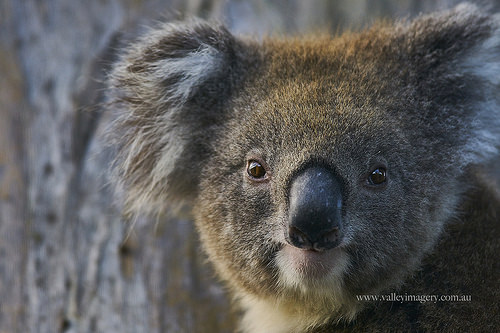

In [66]:
Image.open(image_dict['ILSVRC2017_test_00002003.JPEG']['path'])

In [67]:
#testing on a tif
test_tif = 'test_tif.tif'

In [68]:
img = image.load_img(test_tif, target_size =(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [69]:
pred = model.predict(img_array)

In [70]:
print(decode_predictions(pred,top=3))

[[('n01882714', 'koala', 0.99575657), ('n01883070', 'wombat', 0.0014830185), ('n01877812', 'wallaby', 0.0006051514)]]


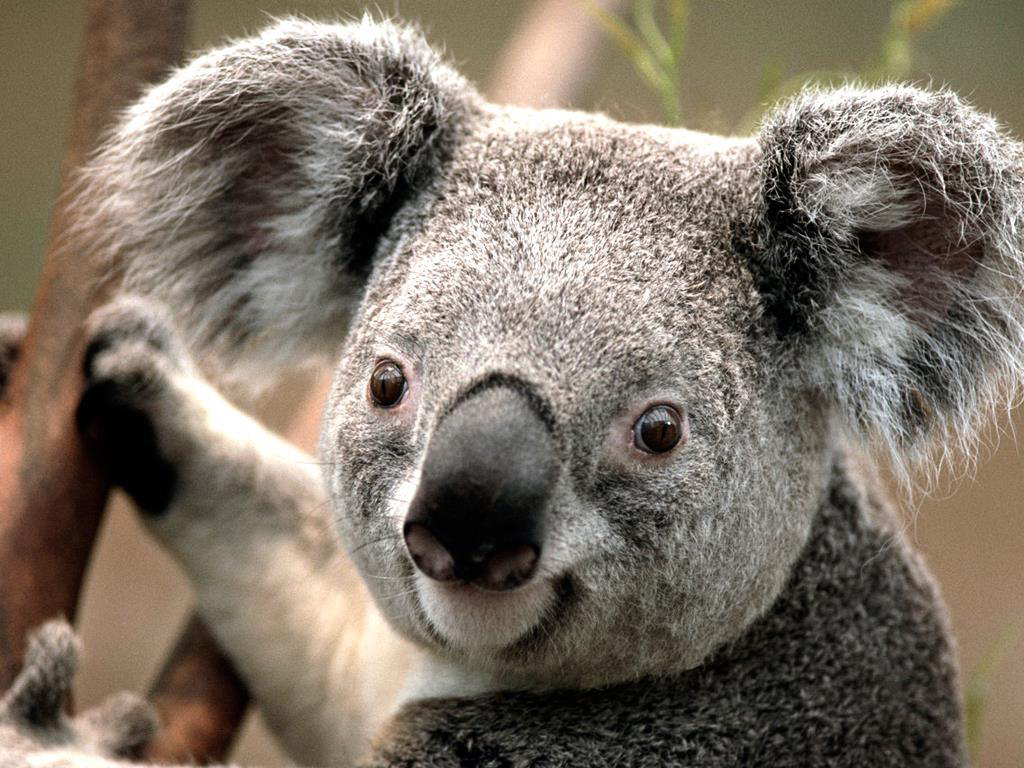

In [71]:
Image.open(test_tif)